# 一、Adaboost回归案例

## 1. 导包加载数据【波士顿房价】

In [70]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
import numpy as np
from sklearn.ensemble import AdaBoostRegressor
from sklearn import datasets
from sklearn import tree
import graphviz

# X,y = datasets.load_boston(return_X_y=True)  该数据集已移除

In [2]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [3]:
X = data
y = target

In [4]:
X.shape

(506, 13)

## 2. 建模

In [5]:
ada = AdaBoostRegressor(n_estimators=3,loss = 'linear', # 线性，误差绝对值
                                 learning_rate=1) # learning_rate 学习率
ada.fit(X,y) # 训练
y_ = ada.predict(X) # 预测
print(y_[:10])

[26.33560209 22.12600897 32.53956044 32.53956044 32.53956044 26.33560209
 20.95826087 17.43088235 17.43088235 17.43088235]


## 3. 可视化

In [6]:
dot_data = tree.export_graphviz(ada[0],filled=True)
graph = graphviz.Source(dot_data)
graph.render('./adaboost回归2',format='png')

'adaboost回归2.png'

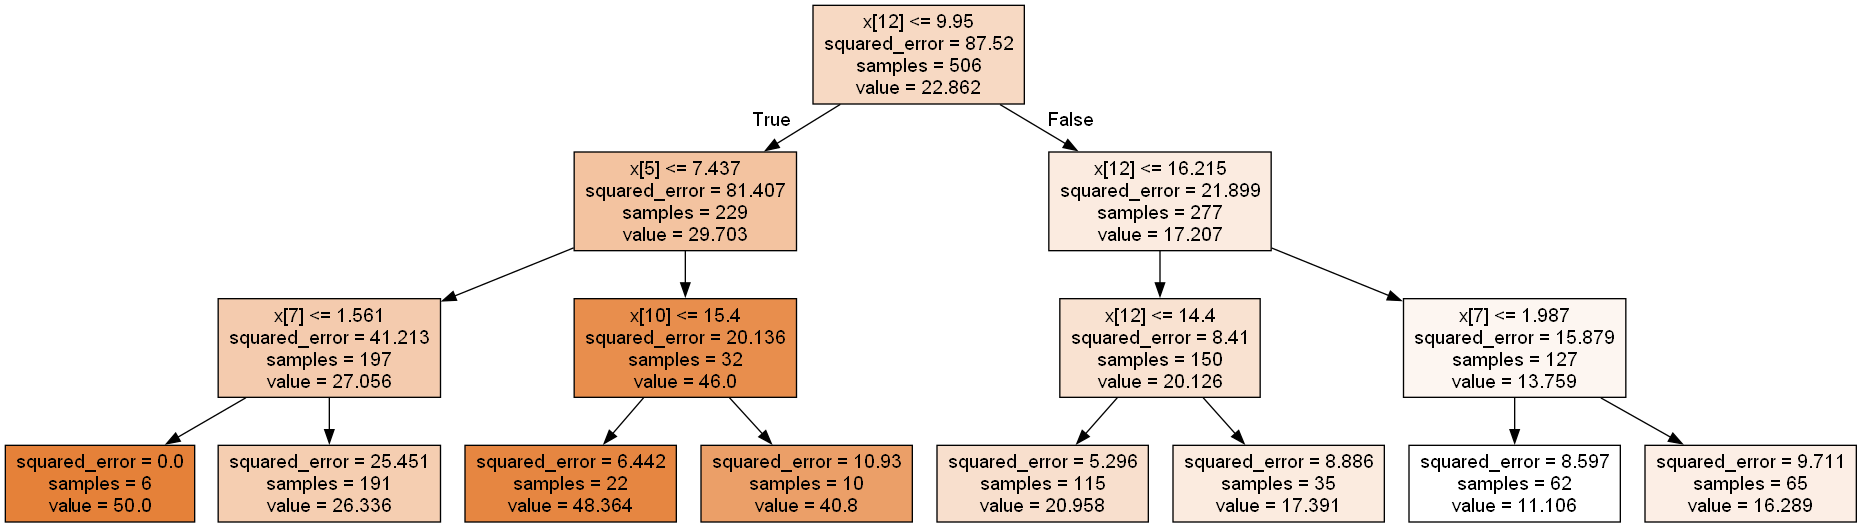

## 4. 第一棵回归树

In [7]:
w1 = np.full(shape = 506,fill_value=1/506)
y1_ = ada[0].predict(X)

In [8]:
# 计算预测值和目标值的误差
error_vector = np.abs(y1_ - y)  # 计算训练集上的误差
error_max = error_vector.max()  # 计算训练集上的最大误差
if error_max != 0:
    error_vector /= error_max   # 归一化0~1  线性误差

# 计算算法误差
estimator_error = (w1 * error_vector).sum()
print('第一棵树误差：',estimator_error)
print('算法误差：',ada.estimator_errors_)

# 计算算法权重
beta = estimator_error / (1. - estimator_error)
estimator_weight =  np.log(1. / beta)
print('第一棵树权重：',estimator_weight)
print('算法权重：', ada.estimator_weights_)

# 根据第一棵树更新权重
w2 = w1 * np.power(beta, (1. - error_vector))
w2 /= w2.sum()

第一棵树误差： 0.17449584169760493
算法误差： [0.17449584 0.18976582 0.10885051]
第一棵树权重： 1.5540933891157225
算法权重： [1.55409339 1.45153251 2.10253673]


## 5. 第二棵回归树

In [9]:
y2_ = ada[1].predict(X)

# 计算预测值和目标值的误差
error_vector = np.abs(y2_ - y)
error_max = error_vector.max()
if error_max != 0:
    error_vector /= error_max # 归一化

# 计算算法误差
estimator_error = (w2 * error_vector).sum()
print('第二棵树误差：',estimator_error)
print('算法误差：',ada.estimator_errors_)

# 计算算法权重
beta = estimator_error / (1. - estimator_error)
estimator_weight =  np.log(1. / beta)
print('第二棵树权重：',estimator_weight)
print('算法权重：', ada.estimator_weights_)

# 权重更新
w3 = w2 * np.power(beta, (1. - error_vector))
w3 /= w3.sum()

第二棵树误差： 0.18976582385729235
算法误差： [0.17449584 0.18976582 0.10885051]
第二棵树权重： 1.4515325062462865
算法权重： [1.55409339 1.45153251 2.10253673]


## 6. 第三棵回归树

In [10]:
y3_ = ada[2].predict(X)

# 计算预测值和目标值的误差
error_vector = np.abs(y3_ - y)
error_max = error_vector.max()
if error_max != 0:
    error_vector /= error_max

# 计算算法误差
estimator_error = (w3 * error_vector).sum()
print('第三棵树误差：',estimator_error)
print('算法误差：',ada.estimator_errors_)

# 计算算法权重
beta = estimator_error / (1. - estimator_error)
estimator_weight =  np.log(1. / beta)
print('第三棵树权重：',estimator_weight)
print('算法权重：', ada.estimator_weights_)

第三棵树误差： 0.10885050912868303
算法误差： [0.17449584 0.18976582 0.10885051]
第三棵树权重： 2.102536727141539
算法权重： [1.55409339 1.45153251 2.10253673]


## 7. 预测值（中位数）

In [11]:
ada.predict(X)[:10] # 取的中位数

array([26.33560209, 22.12600897, 32.53956044, 32.53956044, 32.53956044,
       26.33560209, 20.95826087, 17.43088235, 17.43088235, 17.43088235])

In [12]:
y1_ = ada[0].predict(X)[:10]
y2_ = ada[1].predict(X)[:10]
y3_ = ada[2].predict(X)[:10]
display(y1_,y2_,y3_)

array([26.33560209, 26.33560209, 26.33560209, 26.33560209, 26.33560209,
       26.33560209, 20.95826087, 16.28923077, 16.28923077, 16.28923077])

array([22.12600897, 22.12600897, 32.53956044, 32.53956044, 32.53956044,
       22.12600897, 22.12600897, 17.43088235, 17.43088235, 17.43088235])

array([26.8326087 , 19.68861386, 35.03333333, 35.03333333, 35.03333333,
       26.8326087 , 19.68861386, 19.68861386, 19.68861386, 19.68861386])

In [13]:
result = np.c_[y1_,y2_,y3_]
result

array([[26.33560209, 22.12600897, 26.8326087 ],
       [26.33560209, 22.12600897, 19.68861386],
       [26.33560209, 32.53956044, 35.03333333],
       [26.33560209, 32.53956044, 35.03333333],
       [26.33560209, 32.53956044, 35.03333333],
       [26.33560209, 22.12600897, 26.8326087 ],
       [20.95826087, 22.12600897, 19.68861386],
       [16.28923077, 17.43088235, 19.68861386],
       [16.28923077, 17.43088235, 19.68861386],
       [16.28923077, 17.43088235, 19.68861386]])

In [14]:
np.median(result,axis = 1)

array([26.33560209, 22.12600897, 32.53956044, 32.53956044, 32.53956044,
       26.33560209, 20.95826087, 17.43088235, 17.43088235, 17.43088235])

In [15]:
ada.predict(X)[:10]

array([26.33560209, 22.12600897, 32.53956044, 32.53956044, 32.53956044,
       26.33560209, 20.95826087, 17.43088235, 17.43088235, 17.43088235])